# Survival Analysis

In [ ]:
!pip install lifelines
import lifelines
import numpy as np
import matplotlib.pyplot as plt # version > 3.0
import pandas as pd
from datetime import datetime
from google.colab import drive
drive.mount("/content/drive")
plt.style.use('seaborn')

     |████████████████████████████████| 348kB 8.6MB/s 
     |████████████████████████████████| 61kB 8.5MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-cp37-none-any.whl size=4035 sha256=59a9fc8a938cfeac515c38d3a0e15e9a845d93b1d21ae3c7cfde3b53ea364244
  Stored in directory: /root/.cache/pip/wheels/dc/68/dc/91321c55fba449755524481854f5be70d41912b8f886f908bb
Successfully built autograd-gamma
Mounted at /content/drive


# Example 1: Leukemia

`lifelines` comes with some datasets to get you started playing around with it.

Most of the datasets are cleaned-up versions of real datasets. Here we will use their Leukemia dataset comparing 2 different treatments taken from http://web1.sph.emory.edu/dkleinb/allDatasets/surv2datasets/anderson.dat

In [ ]:
path_to_csv = "/content/drive/MyDrive/ML_Data/No_NaN_Values_New.csv"
sepsis_df = pd.read_csv(path_to_csv)
# sepsis_df.info()

In [ ]:
try :
  sepsis_df.drop('time_to_death',  axis=1, inplace=True)
except :
  pass
sepsis_df.insert(57, column="time_to_death",value=None)
format = '%Y-%m-%d %H:%M:%S'
for i in range(sepsis_df.shape[0]):
  if sepsis_df["death_flag"][i] == 1 and type(sepsis_df["death_time"][i]) is str:
    time_diff = datetime.strptime(sepsis_df["death_time"][i],format) - datetime.strptime(sepsis_df["sofa_time"][i],format)
    time_diff_in_days = time_diff.total_seconds()/(360*24)
    sepsis_df["time_to_death"][i] = time_diff_in_days
    # print(row["time_to_death"])
  else:
    time_diff = datetime.strptime(sepsis_df["dischtime"][i],format) - datetime.strptime(sepsis_df["sofa_time"][i],format)
    time_diff_in_days = time_diff.total_seconds()/(360*24)
    sepsis_df["time_to_death"][i] = time_diff_in_days
    # print(row["time_to_death"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
sepsis_df.isna().sum()

Unnamed: 0                      0
Unnamed: 0.1                    0
subject_id                      0
stay_id                         0
antibiotic_time                 0
culture_time                    0
suspected_infection_time        0
sofa_time                       0
pao2fio2ratio_novent            0
pao2fio2ratio_vent              0
rate_dobutamine                 0
rate_epinephrine                0
rate_norepinephrine             0
rate_dopamine                   0
meanbp_min                      0
gcs_min                         0
uo_24hr                         0
bilirubin_max                   0
creatinine_max                  0
platelet_min                    0
sofa_score                      0
respiration                     0
coagulation                     0
liver                           0
cardiovascular                  0
cns                             0
renal                           0
sepsis3                         0
death_time                  23699
death_flag    

In [ ]:
# try :
#   sepsis_df.drop('time_to_death',  axis=1, inplace=True)
# except :
#   pass
# sepsis_df.insert(57, column="time_to_death",value=None)
# format = '%Y-%m-%d %H:%M:%S'
# sepsis_df["time_to_death"] = sepsis_df.apply(lambda x: 
#                                       {(datetime.strptime(str(x["death_time"]),format) - datetime.strptime(str(x["sofa_time"]),format)).total_seconds()/(360*24)} 
#                                       if {x["death_flag"] == 1 and type(x["death_time"]) is str} 
#                                       else (datetime.strptime(str(x["dischtime"]),format) - datetime.strptime(str(x["sofa_time"]),format)).total_seconds()/(360*24), axis=1)

In [ ]:
sepsis_df['dischtime'].isna().sum()

0

In [ ]:


# for _,row in sepsis_df.iterrows():
#   if row["death_flag"] == 1 and type(row["death_time"]) is str:
#     time_diff = datetime.strptime(row["death_time"],format) - datetime.strptime(row["sofa_time"],format)
#     time_diff_in_days = time_diff.total_seconds()/(360*24)
#     row["time_to_death"] = time_diff_in_days
#     print(row["time_to_death"])
#   else:
#     time_diff = datetime.strptime(row["dischtime"],format) - datetime.strptime(row["sofa_time"],format)
#     time_diff_in_days = time_diff.total_seconds()/(360*24)
#     row["time_to_death"] = time_diff_in_days
#     print(row["time_to_death"])
# sepsis_df.describe()
# sepsis_df.drop(axis=1, columns=["sepsis3","respiration","cardiovascular","liver","renal","cns","coagulation","rn_charttime", "rn_sofa_stay","sofa_time", "charttime", "antibiotic_time", "culture_time","suspected_infection_time","death_time", "subject_id", "stay_id","sofa_score","subject_id_1", "stay_id_1","hadm_id","first_hosp_stay","first_icu_stay","hospstay_seq","icustay_seq"], inplace=True)
# print("Shape", sepsis_df.shape)
# sepsis_df.describe()

In [ ]:
sepsis_df["time_to_death"].describe()

count     27139.0
unique    14097.0
top          40.0
freq         58.0
Name: time_to_death, dtype: float64

In [ ]:
# format = '%Y-%m-%d %H:%M:%S'
# time_diff = datetime.strptime(sepsis_df["dischtime"][0],format) - datetime.strptime(sepsis_df["sofa_time"][0],format)
# # sepsis_df['dischtime'][0]- sepsis_df['sofa_time'][0]
# print(time_diff)

15 days, 7:50:00


In [ ]:
dropColList = ["rn_charttime",
              "rn_sofa_stay",
              "sofa_time", 
              "charttime", 
              "antibiotic_time", 
              "culture_time",
              "suspected_infection_time",
              "death_time",
              "subject_id",
              "stay_id",
              "sofa_score",
              "admittime",
              "dischtime",
               "gender",
               "sbp_ni",
               "mbp_ni",
               "dbp_ni",
               "icustay_seq",
               "first_icu_stay",
               "Unnamed: 0",
               "Unnamed: 0.1 ",
               "subject_id",
               "stay_id",
               "antibiotic_time",
               "culture_time",
               "suspected_infection_time",
               "sofa_time",
               "subject_id_1",
               "hospstay_seq",
               "stay_id_1",
               "hadm_id",
               "sepsis3",
               "respiration",
               "renal",
               "coagulation",
               "liver",
               "cardiovascular",
               "cns",
               "sbp",
               "dbp",
               "los_hospital",
               "pao2fio2ratio_novent",
               "meanbp_min"
               ]
for i in dropColList:
  try :
    sepsis_df = sepsis_df.drop(i,axis=1)
  except :
    pass

In [ ]:
sepsis_df.columns

Index(['pao2fio2ratio_vent', 'rate_dobutamine', 'rate_epinephrine',
       'rate_norepinephrine', 'rate_dopamine', 'gcs_min', 'uo_24hr',
       'bilirubin_max', 'creatinine_max', 'platelet_min', 'death_flag',
       'heart_rate', 'mbp', 'temperature', 'glucose', 'spo2', 'resp_rate',
       'admission_age', 'first_hosp_stay', 'ICULOS', 'time_to_death'],
      dtype='object')

In [ ]:
sepsis_df.isna().sum()

pao2fio2ratio_vent     0
rate_dobutamine        0
rate_epinephrine       0
rate_norepinephrine    0
rate_dopamine          0
gcs_min                0
uo_24hr                0
bilirubin_max          0
creatinine_max         0
platelet_min           0
death_flag             0
heart_rate             0
mbp                    0
temperature            0
glucose                0
spo2                   0
resp_rate              0
admission_age          0
first_hosp_stay        0
ICULOS                 0
time_to_death          0
dtype: int64

In [ ]:
# sepsis_df.drop(sepsis_df.columns[0], axis =1)
sepsis_df = sepsis_df.drop(sepsis_df.columns[0], axis =1)

In [ ]:
# sepsis_df['time_to_death']=sepsis_df['time_to_death'].astype(float)

In [ ]:
# path_to_csv = "/content/drive/MyDrive/ML_Data/No_NaN_Values_New.csv"
# df = pd.read_csv(path_to_csv)
# df['heart_rate'].fillna(80)
# df['sbp'].fillna(120)
# df['mbp'].fillna(100)
# df['dbp'].fillna(80)
# df['sbp_ni'].fillna(120)
# df['mbp_ni'].fillna(100)
# df['dbp_ni'].fillna(80)
# df['temperature'].fillna(97)
# df['glucose'].fillna(140)
# df['spo2'].fillna(95)
# df['resp_rate'].fillna(14)
# df['']

In [ ]:
# updated_df['pao2fio2ratio_vent'].fillna(int(np.random.normal(440,20,1)))

0        461.000000
1        461.000000
2        404.000000
3        314.000000
4        157.397574
            ...    
27134    461.000000
27135    461.000000
27136    461.000000
27137    219.333333
27138    227.500000
Name: pao2fio2ratio_vent, Length: 27139, dtype: float64

In [ ]:
import numpy as np
s = np.random.normal(0.8,0.1,1)             #<= mean = 3, variance = 4
print(s)
# import seaborn as sns
# import matplotlib.pyplot as plt

# AA1_plot  = sns.distplot(s, kde=True, rug=False)
# plt.show()

[0.77520105]


In [ ]:
# path_to_csv = "/content/drive/MyDrive/ML_Data/Sepsis_Lab_and_Vital_with_Stay_Avg.csv"
# updated_df = pd.read_csv(path_to_csv)
# updated_df_copy = updated_df.copy(deep=True)
# updated_df_copy_1 = updated_df_copy.fillna(value={"pao2fio2ratio_novent": float(np.random.normal(450,20,1)),
#                                                   "pao2fio2ratio_vent": float(np.random.normal(440,20,1)),
#                                                   "rate_dobutamine":0 ,
#                                                   "rate_epinephrine":0,
#                                                   "rate_norepinephrine":0, 
#                                                   "rate_dopamine":0,
#                                                   "meanbp_min":float(np.random.normal(100,10,1) ), 
#                                                   "gcs_min":float(np.random.normal(16,2,1)), 
#                                                   "uo_24hr": float(np.random.normal(550,20,1))  ,
#                                                   "bilirubin_max":float(np.random.normal(0.8,0.1,1)) ,
#                                                   "creatinine_max":float(np.random.normal(0.8,0.1,1)),
#                                                   "platelet_min":float(np.random.normal(180,10,1)),
#                                                   "heart_rate":float(np.random.normal(80,10,1)), 
#                                                   "sbp":float(np.random.normal(120,10,1)), 
#                                                   "mbp":float(np.random.normal(100,10,1)), 
#                                                   "dbp":float(np.random.normal(80,10,1)), 
#                                                   "sbp_ni":float(np.random.normal(120,10,1)), 
#                                                   "mbp_ni":float(np.random.normal(100,15,1)),
#                                                   "dbp_ni":float(np.random.normal(80,5,1)), 
#                                                   "temperature":float(np.random.normal(97,3,1)),
#                                                   "glucose":float(np.random.normal(140,10,1)),
#                                                   "spo2":float(np.random.normal(95,2,1)),
#                                                   "resp_rate":float(np.random.normal(14,1,1)) })

# updated_df_copy_1.describe()
# updated_df_copy_1.to_csv("/content/No_NaN_Values_New.csv")

In [ ]:
sepsis_Y = sepsis_df['time_to_death']

In [ ]:
sepsis_Y.isna().sum()

0

In [ ]:
sepsis_X = sepsis_df.drop('time_to_death',axis=1)

In [ ]:
sepsis_X.isna().sum()

pao2fio2ratio_vent     0
rate_dobutamine        0
rate_epinephrine       0
rate_norepinephrine    0
rate_dopamine          0
gcs_min                0
uo_24hr                0
bilirubin_max          0
creatinine_max         0
platelet_min           0
death_flag             0
heart_rate             0
mbp                    0
temperature            0
glucose                0
spo2                   0
resp_rate              0
admission_age          0
first_hosp_stay        0
ICULOS                 0
dtype: int64

In [ ]:
## split df
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( sepsis_X, sepsis_Y, test_size=0.20, random_state=42)

In [ ]:
trainData = [X_train, y_train]
result = pd.concat(trainData, axis = 1)
result.to_csv("/content/drive/MyDrive/ML_Data/sepsisTrainData.csv")

In [ ]:
result.isna().sum()

pao2fio2ratio_vent     0
rate_dobutamine        0
rate_epinephrine       0
rate_norepinephrine    0
rate_dopamine          0
gcs_min                0
uo_24hr                0
bilirubin_max          0
creatinine_max         0
platelet_min           0
death_flag             0
heart_rate             0
mbp                    0
temperature            0
glucose                0
spo2                   0
resp_rate              0
admission_age          0
first_hosp_stay        0
ICULOS                 0
time_to_death          0
dtype: int64

In [ ]:
# trainData.rename(columns={trainData.columns[0]:'time_to_death'}, inplace=True)
# testData.rename(columns={testData.columns[0]:'time_to_death'}, inplace=True)

In [ ]:
# testData.columns
# trainData.to_csv("/content/sepsisTrainData.csv")
testData = [X_test, y_test]
testData = pd.concat(testData, axis =1)
testData.to_csv("/content/drive/MyDrive/ML_Data/sepsisTestData.csv")

In [ ]:
testData.shape

(5428, 21)

In [ ]:
testData.isna().sum()

pao2fio2ratio_vent     0
rate_dobutamine        0
rate_epinephrine       0
rate_norepinephrine    0
rate_dopamine          0
gcs_min                0
uo_24hr                0
bilirubin_max          0
creatinine_max         0
platelet_min           0
death_flag             0
heart_rate             0
mbp                    0
temperature            0
glucose                0
spo2                   0
resp_rate              0
admission_age          0
first_hosp_stay        0
ICULOS                 0
time_to_death          0
dtype: int64

In [ ]:
trainData.rename(columns={trainData.columns[0]:'time_to_death'}, inplace=True)
trainData.shape

(43422, 21)

In [ ]:
testData = [X_test, y_test]
testData = pd.concat(testData)
testData.to_csv("/content/sepsisTestData.csv")

In [ ]:
sepsis_df.corr()

,pao2fio2ratio_vent,rate_dobutamine,rate_epinephrine,rate_norepinephrine,rate_dopamine,gcs_min,uo_24hr,bilirubin_max,creatinine_max,platelet_min,death_flag,heart_rate,mbp,temperature,glucose,spo2,resp_rate,admission_age,first_hosp_stay,ICULOS
pao2fio2ratio_vent,1.000000,-0.057231,-0.106090,-0.249914,-0.052075,-0.089330,-0.149244,-0.035490,0.003930,-0.018967,-0.164229,-0.051641,-0.001393,-0.047874,-0.003040,0.027887,-0.054872,0.086999,-0.069732,-0.288810
rate_dobutamine,-0.057231,1.000000,0.084493,0.152169,0.055121,0.019677,0.025534,0.007860,0.054014,-0.018615,0.076232,0.026944,-0.030097,-0.002245,-0.001163,-0.037881,0.033183,0.008911,-0.013040,0.054797
rate_epinephrine,-0.106090,0.084493,1.000000,0.271174,0.059622,0.012119,-0.023547,0.014174,0.042885,-0.021879,0.105089,0.052871,-0.038711,0.059306,0.001464,-0.061838,0.049180,-0.017202,0.004533,0.011382
rate_norepinephrine,-0.249914,0.152169,0.271174,1.000000,0.135365,0.063845,-0.033420,0.083332,0.129588,-0.004144,0.251457,0.156561,-0.110388,0.077460,0.011247,-0.127336,0.147711,-0.003308,-0.031303,0.126165
rate_dopamine,-0.052075,0.055121,0.059622,0.135365,1.000000,0.015703,-0.008407,-0.004765,0.038767,0.013221,0.066626,-0.004389,-0.031825,0.028929,-0.000621,-0.058873,0.024635,0.019226,0.003370,0.013983
gcs_min,-0.089330,0.019677,0.012119,0.063845,0.015703,1.000000,0.001593,0.011163,0.048813,-0.046491,-0.020754,-0.001314,-0.072225,0.013237,0.006866,-0.016915,-0.003925,-0.059616,0.008855,0.006541
uo_24hr,-0.149244,0.025534,-0.023547,-0.033420,-0.008407,0.001593,1.000000,-0.073172,-0.168902,0.048941,-0.070131,0.004965,0.096710,-0.008165,-0.005325,0.067860,-0.028014,-0.177460,0.102590,0.206098
bilirubin_max,-0.035490,0.007860,0.014174,0.083332,-0.004765,0.011163,-0.073172,1.000000,0.097844,-0.157639,0.140627,0.053210,-0.051456,-0.001094,0.040534,-0.032309,0.023602,-0.110543,0.012441,0.053091
creatinine_max,0.003930,0.054014,0.042885,0.129588,0.038767,0.048813,-0.168902,0.097844,1.000000,-0.011993,0.087784,0.016612,-0.031983,-0.002999,0.004571,-0.055823,0.055819,0.020595,-0.103262,0.018047
platelet_min,-0.018967,-0.018615,-0.021879,-0.004144,0.013221,-0.046491,0.048941,-0.157639,-0.011993,1.000000,-0.025280,0.048767,0.008506,-0.003009,-0.011648,-0.030112,0.070338,0.013146,-0.034291,0.077537


In [ ]:
# regrSepsis = sepsis_df[['pao2fio2ratio_vent', 'time_to_death', 'death_flag']].copy()
# regrSepsis = sepsis_df[['pao2fio2ratio_vent', 'rate_dobutamine','time_to_death', 'death_flag']].copy()
# 'rate_epinephrine' - did not converge
# 'rate_dopamine', - NR
path_to_csv = "/content/drive/MyDrive/ML_Data/sepsisTrainData.csv"
sepsis_df = pd.read_csv(path_to_csv)
regrSepsis = sepsis_df[['pao2fio2ratio_vent', 'rate_dobutamine',
                        'rate_norepinephrine',
                        'rate_dopamine',
                        'rate_epinephrine',
                        'time_to_death', 
                        'death_flag',
                        'gcs_min',
                        'uo_24hr',
                        'bilirubin_max',
                        'creatinine_max',
                        'platelet_min',
                        'heart_rate',
                        'mbp',
                        'temperature',
                        'glucose',
                        'spo2',
                        'resp_rate',
                        'ICULOS'
                        ]].copy()
# Using Cox Proportional Hazards model
cph = lifelines.CoxPHFitter()

cph.fit(regrSepsis, duration_col='time_to_death', event_col='death_flag', show_progress=True, step_size=0.1
      )
cph.print_summary()

Iteration 1: norm_delta = 1.02304, step_size = 0.1000, log_lik = -25050.48436, newton_decrement = 1475.38432, seconds_since_start = 0.4
Iteration 2: norm_delta = 0.68095, step_size = 0.1000, log_lik = -24772.88935, newton_decrement = 827.16124, seconds_since_start = 0.8
Iteration 3: norm_delta = 0.58894, step_size = 0.1000, log_lik = -24615.97488, newton_decrement = 619.74413, seconds_since_start = 1.2
Iteration 4: norm_delta = 0.50802, step_size = 0.1300, log_lik = -24465.53242, newton_decrement = 442.26316, seconds_since_start = 1.5
Iteration 5: norm_delta = 0.42292, step_size = 0.1690, log_lik = -24328.90759, newton_decrement = 289.00417, seconds_since_start = 1.9
Iteration 6: norm_delta = 0.33614, step_size = 0.2197, log_lik = -24216.05820, newton_decrement = 169.16036, seconds_since_start = 2.2
Iteration 7: norm_delta = 0.25036, step_size = 0.2856, log_lik = -24133.30070, newton_decrement = 85.58269, seconds_since_start = 2.6
Iteration 8: norm_delta = 0.16731, step_size = 0.3713, 

<lifelines.CoxPHFitter: fitted with 21711 total observations, 18960 right-censored observations>
             duration col = 'time_to_death'
                event col = 'death_flag'
      baseline estimation = breslow
   number of observations = 21711
number of events observed = 2751
   partial log-likelihood = -24046.05
         time fit was run = 2021-05-10 12:31:24 UTC

---
                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                   
pao2fio2ratio_vent   -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
rate_dobutamine       0.12       1.13       0.01             0.10             0.15                 1.10                 1.16
rate_norepinephrine   1.11       3.03       0.08             0.95             1.27                 2.58                 3.55
rate_dopamine         0.06       1.06       0.01             0.05             0.07                 1.05                 1.07
rate_epinephrine      0.76       2.14       0.27             0.23             1.29                 1.26                 3.63
gcs_min              -0.05       0.95       0.01            -0.07            -0.04                 0.93                 0.96
uo_24hr              -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
bilirubin_max         0.03       1.03       0.00             0.03             0.04                 1.03                 1.04
creatinine_max        0.03       1.03       0.01             0.01             0.05                 1.01                 1.05
platelet_min         -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
heart_rate            0.00       1.00       0.00             0.00             0.01                 1.00                 1.01
mbp                  -0.01       0.99       0.00            -0.01            -0.01                 0.99                 0.99
temperature           0.03       1.03       0.00             0.02             0.03                 1.02                 1.03
glucose               0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
spo2                 -0.04       0.96       0.00            -0.05            -0.03                 0.96                 0.97
resp_rate             0.04       1.04       0.00             0.03             0.04                 1.03                 1.04
ICULOS               -0.05       0.95       0.00            -0.06            -0.05                 0.94                 0.95

                         z      p   -log2(p)
covariate                                   
pao2fio2ratio_vent  -18.87 <0.005     261.39
rate_dobutamine       8.70 <0.005      58.05
rate_norepinephrine  13.53 <0.005     136.07
rate_dopamine         9.33 <0.005      66.36
rate_epinephrine      2.82 <0.005       7.69
gcs_min              -6.92 <0.005      37.69
uo_24hr             -12.86 <0.005     123.35
bilirubin_max        10.86 <0.005      88.83
creatinine_max        2.62   0.01       6.85
platelet_min         -1.78   0.07       3.74
heart_rate            3.95 <0.005      13.66
mbp                  -6.98 <0.005      38.34
temperature          13.25 <0.005     130.65
glucose               0.53   0.60       0.75
spo2                -10.52 <0.005      83.63
resp_rate            11.07 <0.005      92.14
ICULOS              -15.38 <0.005     175.01
---
Concordance = 0.76
Partial AIC = 48126.10
log-likelihood ratio test = 2008.87 on 17 df
-log2(p) of ll-ratio test = inf

In [ ]:
regrSepsis.columns

Index(['pao2fio2ratio_vent', 'rate_dobutamine', 'rate_norepinephrine',
       'rate_dopamine', 'rate_epinephrine', 'time_to_death', 'death_flag',
       'gcs_min', 'uo_24hr', 'bilirubin_max', 'creatinine_max', 'platelet_min',
       'heart_rate', 'mbp', 'temperature', 'glucose', 'spo2', 'resp_rate',
       'ICULOS'],
      dtype='object')

The ``p_value_threshold`` is set at 0.01. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 21711 total observations, 18960 right-censored observations>
         test_name = proportional_hazard_test

---
                          test_statistic      p  -log2(p)
ICULOS              km            598.73 <0.005    436.84
                    rank          790.62 <0.005    575.45
bilirubin_max       km              3.62   0.06      4.13
                    rank            0.81   0.37      1.44
creatinine_max      km             99.70 <0.005     75.57
                    rank           84.62 <0.005     64.58
gcs_min             km              2.76   0.10      3.37
                    rank           10.02 <0.005      9.34
glucose             km              0.00   1.00      0.00
                    rank            0.06   0.80      0.32
heart_rate          km             12.17 <0.005     11.01
                    rank           36.01 <0.005     28.92
mbp                 km              1.30   0.25      1.98
                    rank            7.37   0.01      7.24
pao2fio2ratio_vent  km             89.24 <0.005     67.95
                    rank           77.55 <0.005     59.43
platelet_min        km              0.60   0.44      1.19
                    rank            1.64   0.20      2.32
rate_dobutamine     km              0.90   0.34      1.54
                    rank            1.84   0.17      2.52
rate_dopamine       km              0.09   0.77      0.38
                    rank            4.45   0.03      4.84
rate_epinephrine    km              4.05   0.04      4.50
                    rank           11.47 <0.005     10.47
rate_norepinephrine km              6.02   0.01      6.14
                    rank           11.72 <0.005     10.66
resp_rate           km             87.87 <0.005     66.95
                    rank           81.91 <0.005     62.61
spo2                km              2.40   0.12      3.04
                    rank            0.24   0.62      0.68
temperature         km              1.62   0.20      2.30
                    rank            1.15   0.28      1.82
uo_24hr             km              0.03   0.86      0.21
                    rank            1.24   0.26      1.92



1. Variable 'pao2fio2ratio_vent' failed the non-proportional test: p-value is <5e-05.

   Advice 1: the functional form of the variable 'pao2fio2ratio_vent' might be incorrect. That is,
there may be non-linear terms missing. The proportional hazard test used is very sensitive to
incorrect functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'pao2fio2ratio_vent' using pd.cut, and then specify it in
`strata=['pao2fio2ratio_vent', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


   Bootstrapping lowess lines. May take a moment...


2. Variable 'rate_norepinephrine' failed the non-proportional test: p-value is 0.0006.

   Advice 1: the functional form of the variable 'rate_norepinephrine' might be incorrect. That is,
there may be non-linear terms missing. The proportional hazard test used

[[<matplotlib.axes._subplots.AxesSubplot at 0x7f35d6bdc1d0>,

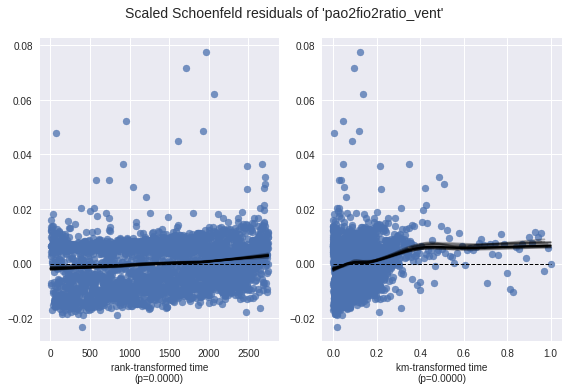

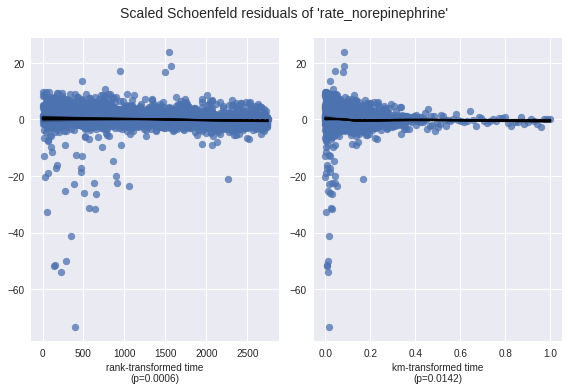

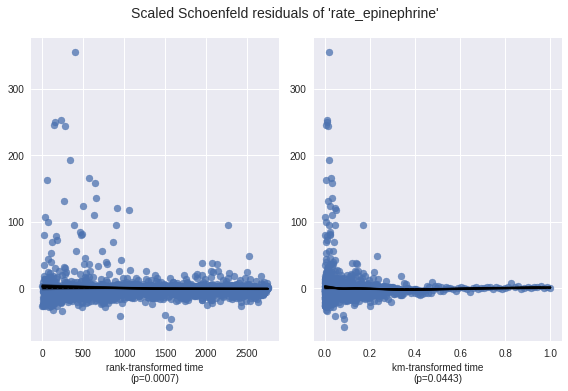

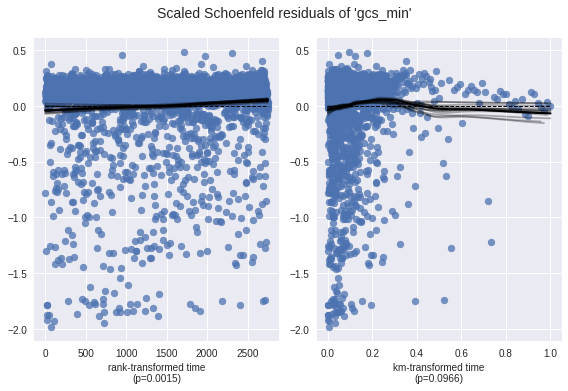

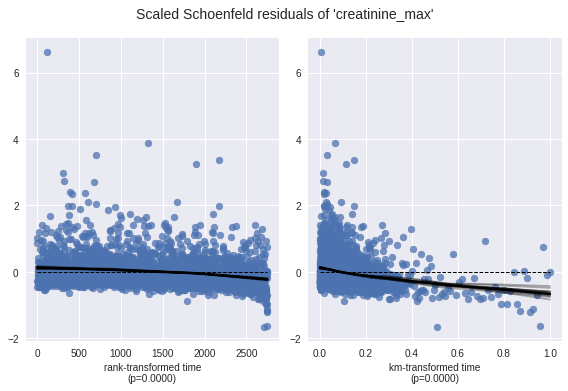

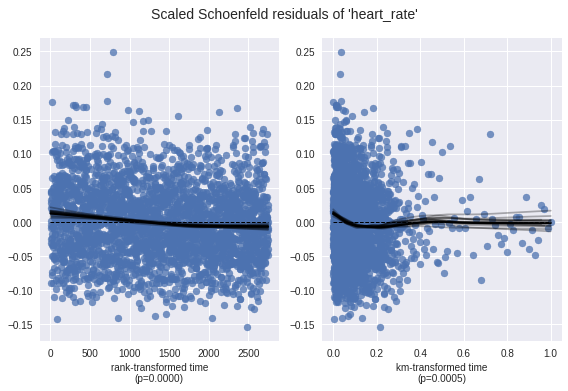

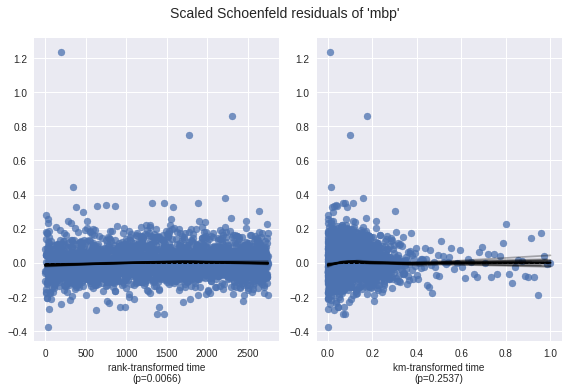

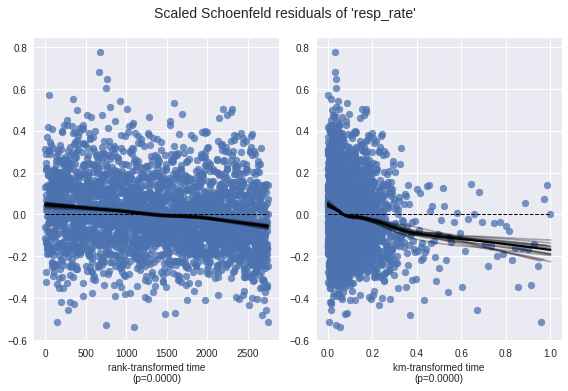

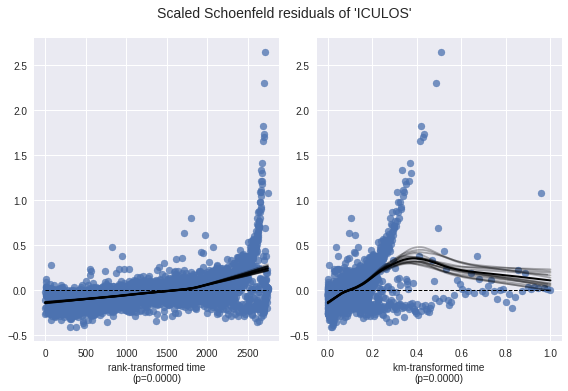

In [ ]:
cph.check_assumptions(regrSepsis, show_plots=True)

In [ ]:
cph.predict_partial_hazard(sr)

0    0.195396
dtype: float64

In [ ]:
path_to_csv = "/content/sr.csv"
sr = pd.read_csv(path_to_csv)

In [ ]:
testData.shape

(5428, 21)

In [ ]:
cph.predict_survival_function(sr)

,0
-8.958333,1.000000
-7.500000,1.000000
-6.458333,1.000000
-6.250000,1.000000
-5.055556,1.000000
...,...
18522.534722,0.607270
20171.062500,0.591776
23344.166667,0.576275
25581.861111,0.533497


## Cox Proportional Hazards Model -- Survival Regression
Useful for comparing relative hazards (model accepts entire DataFrame).

It assumes the ratio of death event risks (hazard) of two groups remains about the same over time.
This ratio is called the hazards ratio or the relative risk.

All Cox regression requires is an assumption that ratio of hazards is constant over time across groups.

*The good news* — we don’t need to know anything about overall shape of risk/hazard over time

*The bad news* — the proportionality assumption can be restrictive

In [ ]:
# Using Cox Proportional Hazards model
cph = lifelines.CoxPHFitter()
sepsis_df_modfied = sepsis_df.drop(axis=1, columns=["rn_charttime",
                                                    "rn_sofa_stay",
                                                    "sofa_time", 
                                                    "charttime", 
                                                    "antibiotic_time", 
                                                    "culture_time",
                                                    "suspected_infection_time",
                                                    "death_time",
                                                    "subject_id",
                                                    "stay_id",
                                                    "sofa_score",
                                                    "admittime",
                                                    "dischtime",
                                                    "gender"])
sepsis_df_modfied = sepsis_df_modfied.fillna(-1)
cph.fit(df=sepsis_df_modfied, duration_col='time_to_death', event_col='death_flag', show_progress=True)
cph.print_summary()['p']

Iteration 1: norm_delta = 0.52472, step_size = 0.9000, log_lik = -24624.72211, newton_decrement = 583.67699, seconds_since_start = 0.4
Iteration 2: norm_delta = 0.48917, step_size = 0.9000, log_lik = -23947.05135, newton_decrement = 273.16906, seconds_since_start = 0.9
Iteration 3: norm_delta = 0.34322, step_size = 0.9000, log_lik = -23632.38272, newton_decrement = 62.40089, seconds_since_start = 1.3
Iteration 4: norm_delta = 0.08544, step_size = 1.0000, log_lik = -23563.37597, newton_decrement = 2.27945, seconds_since_start = 1.8
Iteration 5: norm_delta = 0.00441, step_size = 1.0000, log_lik = -23561.02963, newton_decrement = 0.00520, seconds_since_start = 2.2
Iteration 6: norm_delta = 0.00001, step_size = 1.0000, log_lik = -23561.02441, newton_decrement = 0.00000, seconds_since_start = 2.7
Convergence success after 6 iterations.


<lifelines.CoxPHFitter: fitted with 27139 total observations, 23695 right-censored observations>
             duration col = 'time_to_death'
                event col = 'death_flag'
      baseline estimation = breslow
   number of observations = 27139
number of events observed = 3444
   partial log-likelihood = -23561.02
         time fit was run = 2021-05-08 15:53:32 UTC

---
                       coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                    
pao2fio2ratio_novent  -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
pao2fio2ratio_vent     0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
rate_dobutamine        0.01       1.01       0.02            -0.04             0.06                 0.96                 1.06
rate_epinephrine       0.15       1.16       0.08            -0.01             0.31                 0.99                 1.36
rate_norepinephrine    0.16       1.18       0.03             0.10             0.23                 1.10                 1.26
rate_dopamine          0.02       1.02       0.01             0.01             0.04                 1.01                 1.04
meanbp_min            -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
gcs_min               -0.00       1.00       0.00            -0.01             0.00                 0.99                 1.00
uo_24hr                0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
bilirubin_max          0.00       1.00       0.00            -0.01             0.01                 0.99                 1.01
creatinine_max         0.01       1.01       0.01            -0.02             0.03                 0.98                 1.03
platelet_min           0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
heart_rate             0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
sbp                   -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
mbp                   -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
dbp                    0.00       1.00       0.00            -0.00             0.01                 1.00                 1.01
sbp_ni                -0.00       1.00       0.00            -0.01            -0.00                 0.99                 1.00
mbp_ni                 0.00       1.00       0.00             0.00             0.01                 1.00                 1.01
dbp_ni                 0.00       1.00       0.00            -0.01             0.01                 0.99                 1.01
temperature           -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
glucose               -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
spo2                  -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
resp_rate              0.01       1.01       0.00             0.01             0.02                 1.01                 1.02
subject_id_1          -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
hadm_id               -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
stay_id_1             -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
los_hospital          -0.06       0.94       0.00            -0.07            -0.06         

TypeError: ignored

In [ ]:
# Using Cox Proportional Hazards model
cph = lifelines.CoxPHFitter()
sepsis2 = sepsis_df.drop(axis=1, columns=["rn_charttime",
                                                    "rn_sofa_stay",
                                                    "sofa_time", 
                                                    "charttime", 
                                                    "antibiotic_time", 
                                                    "culture_time",
                                                    "suspected_infection_time",
                                                    "death_time",
                                                    "subject_id",
                                                    "stay_id",
                                                    "sofa_score",
                                                    "admittime",
                                                    "dischtime",
                                                    "gender",
                                                    "hospstay_seq",
                                                    "subject_id_1",
                                                    "dbp_ni",
                                                    "sbp",
                                                    "creatinine_max",
                                                    "bilirubin_max",
                                                    "rate_dobutamine"
                                                     ])
sepsis2 = sepsis2.fillna(-1)
cph.fit(df=sepsis2, duration_col='time_to_death', event_col='death_flag', show_progress=True)
cph.print_summary()

Iteration 1: norm_delta = 0.54202, step_size = 0.9000, log_lik = -24624.72211, newton_decrement = 581.34510, seconds_since_start = 0.4
Iteration 2: norm_delta = 0.48078, step_size = 0.9000, log_lik = -23948.95634, newton_decrement = 273.49655, seconds_since_start = 0.8
Iteration 3: norm_delta = 0.33488, step_size = 0.9000, log_lik = -23634.00165, newton_decrement = 62.01287, seconds_since_start = 1.2
Iteration 4: norm_delta = 0.08334, step_size = 1.0000, log_lik = -23565.47260, newton_decrement = 2.22804, seconds_since_start = 1.7
Iteration 5: norm_delta = 0.00423, step_size = 1.0000, log_lik = -23563.18015, newton_decrement = 0.00492, seconds_since_start = 2.0
Iteration 6: norm_delta = 0.00001, step_size = 1.0000, log_lik = -23563.17522, newton_decrement = 0.00000, seconds_since_start = 2.4
Convergence success after 6 iterations.


<lifelines.CoxPHFitter: fitted with 27139 total observations, 23695 right-censored observations>
             duration col = 'time_to_death'
                event col = 'death_flag'
      baseline estimation = breslow
   number of observations = 27139
number of events observed = 3444
   partial log-likelihood = -23563.18
         time fit was run = 2021-05-08 15:57:50 UTC

---
                       coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                    
pao2fio2ratio_novent  -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
pao2fio2ratio_vent     0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
rate_epinephrine       0.16       1.17       0.08             0.00             0.31                 1.00                 1.37
rate_norepinephrine    0.16       1.18       0.03             0.10             0.23                 1.10                 1.26
rate_dopamine          0.02       1.02       0.01             0.01             0.04                 1.01                 1.04
meanbp_min            -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
gcs_min               -0.00       1.00       0.00            -0.01             0.00                 0.99                 1.00
uo_24hr                0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
platelet_min           0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
heart_rate             0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
mbp                   -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
dbp                    0.00       1.00       0.00            -0.00             0.01                 1.00                 1.01
sbp_ni                -0.00       1.00       0.00            -0.01            -0.00                 0.99                 1.00
mbp_ni                 0.01       1.01       0.00             0.00             0.01                 1.00                 1.01
temperature           -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
glucose               -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
spo2                  -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
resp_rate              0.01       1.01       0.00             0.01             0.02                 1.01                 1.02
hadm_id               -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
stay_id_1             -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
los_hospital          -0.06       0.94       0.00            -0.07            -0.06                 0.93                 0.94
admission_age         -0.00       1.00       0.00            -0.01            -0.00                 0.99                 1.00
first_hosp_stay        0.45       1.57       0.06             0.34             0.56                 1.40                 1.75
ICULOS                -0.06       0.94       0.00            -0.07            -0.05                 0.93                 0.95
icustay_seq            0.92       2.50       0.09             0.75             1.09                 2.11                 2.97
first_icu_stay         0.51       1.67       0.12             0.28             0.74                 1.32                 2.10

                          z      p   -log2(p)
covariate                                    

### Interpreting the Results
`coef`: usually denoted with $b$, the coefficient

`exp(coef)`: $e^{b}$, equals the estimate of the hazard ratio. Here, we can say that participants who received treatment 1 had ~4.5 times the hazard risk (risk of death) compared to those who received treatment 2. And for every unit the `logWBC` increased, the hazard risk increased >5 times.

`se(coef)`: standard error of the coefficient (used for calculating z-score and therefore p-value)

`z`: z-score $\frac{b}{se(b)}$

`p`: p-value. derived from z-score. describes statistical significance. more specifically, it is the likelihood that the variable has no effect on the outcome

`log(p)`: natural logarithm of p-value... used to more easily see differences in significance

`lower/upper 0.95`: confidence levels for the coefficients. in this case, we can confidently say that the coefficient for `logWBC` is somewhere _between_ 1.02 and 2.34.

`Signif. codes`: easily, visually identify significant variables! The more stars, the more solid (simply based on p-value). Here `logWBC` is highly significant, `Rx` is significant, and `sex` has no statistical significance

`Concordance`: a measure of predictive power for classification problems (here looking at the `status` column. a value from 0 to 1 where values above 0.6 are considered good fits (the higher the better)

`Likelihood ratio (LR) test`: this is a measure of how likely it is that the coefficients are not zero, and can compare the goodness of fit of a model versus an alternative null model. Is often actually calculated as a logarithm, resulting in the log-likelihood ratio statistic and allowing the distribution of the test statistic to be approximated with [Wilks' theorem](https://en.wikipedia.org/wiki/Wilks%27_theorem).

In [ ]:
# investigate continuous feature, must bin with 'values' argument
cph.plot_covariate_groups(covariate='logWBC', values=np.arange(1.5,5,.5));

In [ ]:
# categorical feature
cph.plot_covariate_groups(covariate='sex', values=[0,1]);

Check assumption that the **Cox model assumes the ratio of death events between groups remains constant over time**.

In [ ]:
cph.check_assumptions(leukemia)

In [ ]:
# We can see that the sex variable is not very useful by plotting the coefficients
cph.plot();

Let's do what the check_assumptions function suggested:

>Advice: with so few unique values (only 2), you can try  `strata=['sex']` in the call in `.fit`.

In [ ]:
cph = lifelines.CoxPHFitter()
cph.fit(df=leukemia, duration_col='t', 
        event_col='status', strata=['sex'])
cph.print_summary()
cph.baseline_cumulative_hazard_.shape

This regression:

`Log-likelihood ratio test = 69.61 on 2 df, -log2(p)=50.21`

Regression including `sex`:

`Log-likelihood ratio test = 47.19 on 3 df, -log2(p)=31.55`

The `LRT` and `-log2(p)` are higher, meaning this is likely a better fitting model.

In [ ]:
cph.plot();

In [ ]:
cph.compute_residuals(leukemia, kind='score')

In [ ]:
surv_func = cph.predict_survival_function(leukemia[:5])

exp_lifetime = cph.predict_expectation(leukemia[:5])

plt.plot(surv_func)

exp_lifetime

# Example 2: Recidivism

The Rossi dataset originally comes from Rossi et al. (1980), and is used as an example in Allison (1995).

The data pertain to 432 convicts who were released from Maryland state prisons in the 1970s and who were followed up for one year after release. Half the released convicts were assigned at random to an experimental treatment in which they were given financial aid; half did not receive aid.

In [ ]:
from lifelines.datasets import load_rossi
recidivism = load_rossi()

recidivism.head()

# Looking at the Rossi dataset, how long do you think the study lasted?

# All features are coded with numerical values, but which features do you think 
# are actually categorical?

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3


In [ ]:
pd.DataFrame({'dtypes':recidivism.dtypes,
              'nunique':recidivism.nunique()})

,dtypes,nunique
week,int64,49
arrest,int64,2
fin,int64,2
age,int64,28
race,int64,2
wexp,int64,2
mar,int64,2
paro,int64,2
prio,int64,17


In [ ]:
recidivism.describe()

,week,arrest,fin,age,race,wexp,mar,paro,prio
count,432.000000,432.000000,432.00000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000
mean,45.854167,0.263889,0.50000,24.597222,0.877315,0.571759,0.122685,0.618056,2.983796
std,12.662293,0.441251,0.50058,6.113375,0.328456,0.495398,0.328456,0.486426,2.896068
min,1.000000,0.000000,0.00000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,0.000000,0.00000,20.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,52.000000,0.000000,0.50000,23.000000,1.000000,1.000000,0.000000,1.000000,2.000000
75%,52.000000,1.000000,1.00000,27.000000,1.000000,1.000000,0.000000,1.000000,4.000000
max,52.000000,1.000000,1.00000,44.000000,1.000000,1.000000,1.000000,1.000000,18.000000


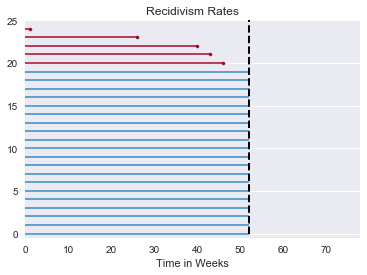

In [ ]:
# plot "lifelines" of the study participants as they attempt to avoid recidivism
recidivism_sample = recidivism.sample(n=25)

duration = recidivism_sample.week.values
arrested = recidivism_sample.arrest.values

ax = lifelines.plotting.plot_lifetimes(duration, event_observed=arrested)
ax.set_xlim(0, 78)
ax.grid(axis='x')
ax.vlines(52, 0, 25, lw=2, linestyles='--')
ax.set_xlabel("Time in Weeks")
ax.set_title("Recidivism Rates");
plt.plot();

In [ ]:
kmf = lifelines.KaplanMeierFitter()

duration = recidivism.week
arrested = recidivism.arrest

kmf.fit(duration, arrested)

<lifelines.KaplanMeierFitter: fitted with 432 observations, 318 censored>

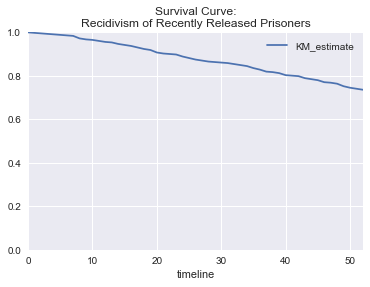

In [ ]:
kmf.survival_function_.plot()
plt.title('Survival Curve:\nRecidivism of Recently Released Prisoners')
plt.ylim(0,1);

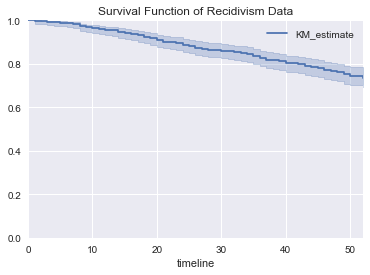

In [ ]:
kmf.plot()
plt.title('Survival Function of Recidivism Data')
plt.ylim(0,1);

In [ ]:
print(f'Median time before recidivism: {kmf.median_} weeks')

Median time before recidivism: inf weeks


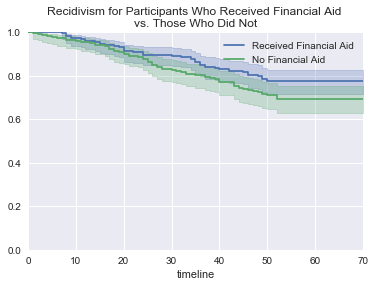

In [ ]:
kmf_w_aid = lifelines.KaplanMeierFitter()
kmf_no_aid = lifelines.KaplanMeierFitter()

ax = plt.subplot(111)

w_aid = (recidivism['fin']==1)

t = np.linspace(0, 70, 71)
kmf_w_aid.fit(duration[w_aid], event_observed=arrested[w_aid], 
              timeline=t, label="Received Financial Aid")
ax = kmf_w_aid.plot(ax=ax)
#print("Median survival time of democratic:", kmf.median_)

kmf_no_aid.fit(duration[~w_aid], event_observed=arrested[~w_aid], 
               timeline=t, label="No Financial Aid")
ax = kmf_no_aid.plot(ax=ax)
#print("Median survival time of non-democratic:", kmf.median_)

plt.ylim(0,1)
plt.title("Recidivism for Participants Who Received Financial Aid \nvs. Those Who Did Not");

          NA_estimate
timeline             
0.0          0.000000
1.0          0.002315
2.0          0.004635
3.0          0.006961
4.0          0.009292


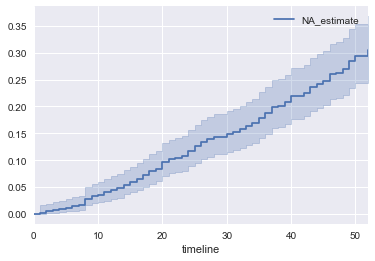

In [ ]:
naf = lifelines.NelsonAalenFitter()
naf.fit(duration, arrested)

print(naf.cumulative_hazard_.head())
naf.plot();

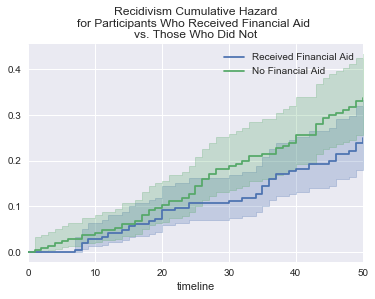

In [ ]:
naf_w_aid = lifelines.NelsonAalenFitter()
naf_no_aid = lifelines.NelsonAalenFitter()

naf_w_aid.fit(duration[w_aid], event_observed=arrested[w_aid], 
              timeline=t, label="Received Financial Aid")
ax = naf_w_aid.plot(loc=slice(0, 50))
naf_no_aid.fit(duration[~w_aid], event_observed=arrested[~w_aid], 
               timeline=t, label="No Financial Aid")
ax = naf_no_aid.plot(ax=ax, loc=slice(0, 50))
plt.title("Recidivism Cumulative Hazard\n"
          "for Participants Who Received Financial Aid \n"
          "vs. Those Who Did Not");

In [ ]:
cph = lifelines.CoxPHFitter()
cph.fit(recidivism, duration_col='week', 
        event_col='arrest', show_progress=True)

cph.print_summary()

Iteration 1: norm_delta = 0.48337, step_size = 0.9500, ll = -675.38063, newton_decrement = 16.76434, seconds_since_start = 0.0
Iteration 2: norm_delta = 0.13160, step_size = 0.9500, ll = -659.79004, newton_decrement = 0.99157, seconds_since_start = 0.0
Iteration 3: norm_delta = 0.01712, step_size = 0.9500, ll = -658.76197, newton_decrement = 0.01422, seconds_since_start = 0.0
Iteration 4: norm_delta = 0.00108, step_size = 1.0000, ll = -658.74771, newton_decrement = 0.00005, seconds_since_start = 0.0
Iteration 5: norm_delta = 0.00000, step_size = 1.0000, ll = -658.74766, newton_decrement = 0.00000, seconds_since_start = 0.0
Convergence completed after 5 iterations.
<lifelines.CoxPHFitter: fitted with 432 observations, 318 censored>
      duration col = 'week'
         event col = 'arrest'
number of subjects = 432
  number of events = 114
    log-likelihood = -658.75
  time fit was run = 2019-02-27 00:22:32 UTC

---
      coef  exp(coef)  se(coef)     z      p  -log2(p)  lower 0.95  uppe

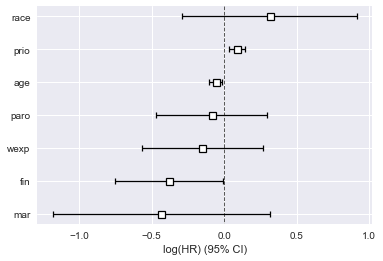

In [ ]:
cph.plot();

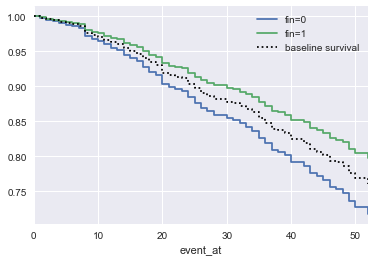

In [ ]:
cph.plot_covariate_groups('fin', [0, 1]);

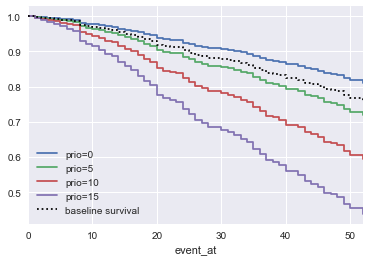

In [ ]:
cph.plot_covariate_groups('prio', [0, 5, 10, 15]);

In [ ]:
r = cph.compute_residuals(recidivism, 'martingale')
r.head()

,week,arrest,martingale
313,1.0,True,0.997048
100,2.0,True,0.998585
183,3.0,True,0.993959
416,4.0,True,0.987465
79,5.0,True,0.979341


In [ ]:
cph.check_assumptions(recidivism)


The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some covariates
will be below the threshold (i.e. by chance). This is compounded when there are many covariates.

Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and eyeball tests to
determine the most serious violations.


<lifelines.StatisticalResult>
         test_name = proportional_hazard_test
 null_distribution = chi squared
degrees_of_freedom = 1

---
           test_statistic      p  -log2(p)
age  km             11.03 <0.005     10.12
     rank           11.09 <0.005     10.17
fin  km              0.02   0.89      0.17
     rank            0.02   0.90      0.16
mar  km              0.60   0.44      1.19
     rank            0.67   0.41      1.27
paro km              0.12   0.73      0.45
     rank            0.14   0.71      0.49
prio km   

In [ ]:
cph.predict_cumulative_hazard(leukemia[:5])

# Example 3: Heart Attack Survival

https://archive.ics.uci.edu/ml/datasets/echocardiogram

In [ ]:
# TODO

# Example 4: Customer Churn

Treselle Systems, a data consulting service, [analyzed customer churn data using logistic regression](http://www.treselle.com/blog/customer-churn-logistic-regression-with-r/). For simply modeling whether or not a customer left, logistic can work, but if we want to model the actual tenure of a customer, survival analysis is more appropriate.

The "tenure" feature represents the duration that a given customer has been with them, and "churn" represents whether or not that customer left (i.e. the "event", from a survival analysis perspective).

data source: https://github.com/treselle-systems/customer_churn_analysis

- What features best model customer churn?
- What would you characterize as the "warning signs" that a customer may discontinue service?
- What actions would you recommend to this business to try to improve their customer retention?

Please create at least *3* plots or visualizations to support your findings, and in general write your summary/results targeting an "interested layperson" (e.g. your hypothetical business manager) as your audience.

This means that, as is often the case in data science, there isn't a single objective right answer - your goal is to *support* your answer, whatever it is, with data and reasoning.

In [ ]:
churn_data = pd.read_csv('https://raw.githubusercontent.com/'
                         'treselle-systems/customer_churn_analysis/'
                         'master/WA_Fn-UseC_-Telco-Customer-Churn.csv')
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
event_col = 'Churn'
duration_col = 'tenure'

churn_data[event_col] = churn_data[event_col].map({'No':0, 'Yes':1})

predictors = sorted(list(set(churn_data.columns) - set([event_col, duration_col])))

In [ ]:
pd.DataFrame({'dtypes':churn_data[predictors].dtypes,
              'nunique':churn_data[predictors].nunique()})

,dtypes,nunique
Contract,object,3
Dependents,object,2
DeviceProtection,object,3
InternetService,object,3
MonthlyCharges,float64,1585
MultipleLines,object,3
OnlineBackup,object,3
OnlineSecurity,object,3
PaperlessBilling,object,2
Partner,object,2


`TotalCharges` should be numeric, contains ' '

In [ ]:
# InternetService was perfectly collienar with StreamingMovies and StreamingTV
to_dummy = ['Partner', 'InternetService', 'SeniorCitizen',
            'gender', 'Dependents', 'Contract']

In [ ]:
for col in to_dummy:
    print(col, '\n', churn_data[col].value_counts(), 
          '\n\n', sep='')

Partner
No     3641
Yes    3402
Name: Partner, dtype: int64


InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


SeniorCitizen
0    5901
1    1142
Name: SeniorCitizen, dtype: int64


gender
Male      3555
Female    3488
Name: gender, dtype: int64


Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64


Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64




In [ ]:
churn_data['Contract'] = churn_data['Contract'].map({'Month-to-month':'No'})
churn_data['gender'] = churn_data['gender'].map({'Male':'No'})

In [ ]:
for col in to_dummy:
    if 'No' in churn_data[col].unique():
        churn_data[col] = churn_data[col].map({'No':0}).fillna(1)

In [ ]:
predictors = to_dummy

In [ ]:
churn_data[[event_col, duration_col] + predictors].corr()

,Churn,tenure,Partner,InternetService,SeniorCitizen,gender,Dependents,Contract
Churn,1.000000,-0.352229,-0.150448,0.227890,0.150889,0.008612,-0.164221,-0.405103
tenure,-0.352229,1.000000,0.379697,0.039062,0.016567,-0.005106,0.159712,0.645561
Partner,-0.150448,0.379697,1.000000,-0.000615,0.016479,0.001808,0.452676,0.280865
InternetService,0.227890,0.039062,-0.000615,1.000000,0.182742,0.006026,-0.139812,-0.218639
SeniorCitizen,0.150889,0.016567,0.016479,0.182742,1.000000,0.001874,-0.211185,-0.138360
gender,0.008612,-0.005106,0.001808,0.006026,0.001874,1.000000,-0.010517,-0.003386
Dependents,-0.164221,0.159712,0.452676,-0.139812,-0.211185,-0.010517,1.000000,0.231720
Contract,-0.405103,0.645561,0.280865,-0.218639,-0.138360,-0.003386,0.231720,1.000000


In [ ]:
cph = lifelines.CoxPHFitter()
cph.fit(churn_data[[event_col, duration_col] + predictors],
        duration_col=duration_col, event_col=event_col)

cph.print_summary()

<lifelines.CoxPHFitter: fitted with 7043 observations, 5174 censored>
      duration col = 'tenure'
         event col = 'Churn'
number of subjects = 7043
  number of events = 1869
    log-likelihood = -14323.25
  time fit was run = 2019-02-27 16:00:43 UTC

---
                 coef  exp(coef)  se(coef)      z      p  -log2(p)  lower 0.95  upper 0.95
Partner         -0.60       0.55      0.05 -11.10 <0.005     92.64       -0.71       -0.50
InternetService  0.59       1.81      0.10   5.97 <0.005     28.63        0.40        0.79
SeniorCitizen    0.02       1.02      0.06   0.32   0.75      0.42       -0.09        0.13
gender           0.03       1.04      0.05   0.75   0.45      1.14       -0.06        0.13
Dependents      -0.15       0.86      0.07  -2.13   0.03      4.93       -0.28       -0.01
Contract        -2.78       0.06      0.08 -33.85 <0.005    831.82       -2.94       -2.62
---
Concordance = 0.81
Log-likelihood ratio test = 2659.57 on 6 df, -log2(p)=inf


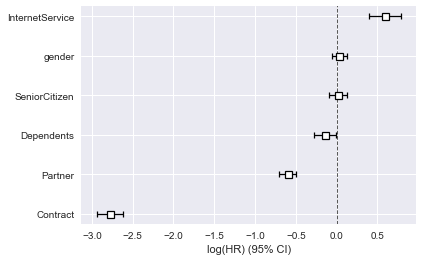

In [ ]:
cph.plot();

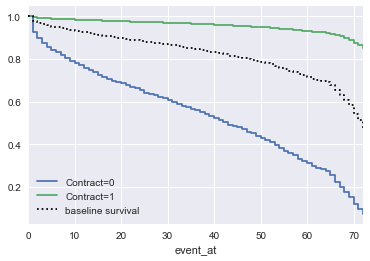

In [ ]:
# categorical feature
cph.plot_covariate_groups(covariate='Contract', values=[0,1]);

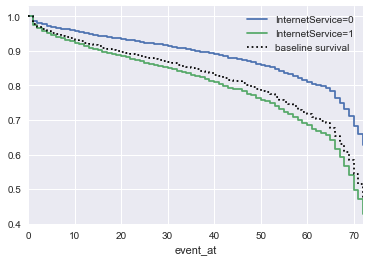

In [ ]:
# categorical feature
cph.plot_covariate_groups(covariate='InternetService', values=[0,1]);

In [ ]:
cph.check_assumptions(churn_data[[event_col, duration_col] + predictors])


The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some covariates
will be below the threshold (i.e. by chance). This is compounded when there are many covariates.

Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and eyeball tests to
determine the most serious violations.


<lifelines.StatisticalResult>
         test_name = proportional_hazard_test
 null_distribution = chi squared
degrees_of_freedom = 1

---
                      test_statistic      p  -log2(p)
Contract        km             85.28 <0.005     65.07
                rank           69.59 <0.005     53.61
Dependents      km              0.62   0.43      1.22
                rank            0.67   0.41      1.28
InternetService km             28.91 <0.005     23.65
                rank           32.29 <0.005     26.16
Partner         km 

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sksurv.nonparametric import kaplan_meier_estimator

time, survival_prob = kaplan_meier_estimator(sepsis_df_modfied["death_flag"], sepsis_df_modfied["time_to_death"])
plt.step(time, survival_prob, where="post")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")

ModuleNotFoundError: ignored

In [ ]:
## Scikit Survival

In [ ]:
!pip install --upgrade pip
!pip uninstall --yes --quiet osqp
!pip install -U scikit-survival

     |████████████████████████████████| 1.6MB 2.8MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
  Using cached scikit-survival-0.15.0.post0.tar.gz (2.4 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 2.3 MB 3.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 212 kB 43.2 MB/s 
  Created wheel for scikit-survival: filename=scikit_survival-0.14.0-cp37-cp37m-linux_x86_64.whl size=4061816 sha256=ca9c64b4b3b233462a2df4b4d2bdf672e1b53775b660199146f59cdfeb936de6
  Stored in directory: /root/.cache/pip/wheels/a2/3e/97/3722ba215d3dfe5429c1a7e4f24f535a3f46004fb29a16d505
Successfully built scikit-survival


In [ ]:
path_to_csv = "/content/drive/MyDrive/bq3.csv"
# path_to_csv = "Sep_Lab_Vitals.csv"
sepsis_df = pd.read_csv(path_to_csv)
# sepsis_df = pd.read_csv(path_to_csv)
sepsis_df.insert(42, column="time_to_death",value=None)
format = '%Y-%m-%d %H:%M:%S'
# print(sepsis_df['time_to_death'].unique())
for i in range(sepsis_df.shape[0]):
  if sepsis_df["death_flag"][i] == 1 and type(sepsis_df["death_time"][i]) is str:
    # print("not none")
    time_diff = datetime.strptime(sepsis_df["death_time"][i],format) - datetime.strptime(sepsis_df["sofa_time"][i],format)
    time_diff_in_days = time_diff.total_seconds()/(360*24)
    # print(time_diff_in_days)
    # row["time_to_death"] = time_diff_in_days
    sepsis_df["time_to_death"][i]= time_diff_in_days
  else:
    # print("none")
    sepsis_df["time_to_death"][i]=  None
    # print( sepsis_df["time_to_death"][i])
sepsis_df.drop('sepsis3', axis=1, inplace=True)
sepsis_df.drop('respiration', axis=1, inplace=True)
sepsis_df.drop('cardiovascular', axis=1, inplace=True)
sepsis_df.drop('liver', axis=1, inplace=True)
sepsis_df.drop('renal', axis=1, inplace=True)
sepsis_df.drop('cns', axis=1, inplace=True)
sepsis_df.drop('coagulation', axis=1, inplace=True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [ ]:
sepsis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35010 entries, 0 to 35009
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   subject_id                35010 non-null  int64  
 1   stay_id                   35010 non-null  int64  
 2   antibiotic_time           35010 non-null  object 
 3   culture_time              35010 non-null  object 
 4   suspected_infection_time  35010 non-null  object 
 5   sofa_time                 35010 non-null  object 
 6   pao2fio2ratio_novent      3163 non-null   float64
 7   pao2fio2ratio_vent        5428 non-null   float64
 8   rate_dobutamine           163 non-null    float64
 9   rate_epinephrine          1182 non-null   float64
 10  rate_norepinephrine       5294 non-null   float64
 11  rate_dopamine             553 non-null    float64
 12  meanbp_min                32877 non-null  float64
 13  gcs_min                   18597 non-null  float64
 14  uo_24h

In [ ]:
sepsis_df['subject_id'].unique()

array([10017531, 10069992, 10155915, ..., 19863368, 19869901, 19894874])

In [ ]:
sepsis_df.groupby('subject_id')

In [ ]:
sepsis_group = sepsis_df.groupby('subject_id')
sepsis_group.first()

,stay_id,antibiotic_time,culture_time,suspected_infection_time,sofa_time,pao2fio2ratio_novent,pao2fio2ratio_vent,rate_dobutamine,rate_epinephrine,rate_norepinephrine,rate_dopamine,meanbp_min,gcs_min,uo_24hr,bilirubin_max,creatinine_max,platelet_min,sofa_score,death_time,death_flag,heart_rate,sbp,mbp,dbp,sbp_ni,mbp_ni,dbp_ni,temperature,glucose,spo2,resp_rate,charttime,rn_charttime,rn_sofa_stay,time_to_death,subject_id_1,hadm_id,stay_id_1,gender,admittime,dischtime,los_hospital,admission_age,hospstay_seq,first_hosp_stay,ICULOS,icustay_seq,first_icu_stay
subject_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10001884,37510196,2131-01-11 08:00:00,2131-01-10 16:36:00,2131-01-10 16:36:00,2131-01-11 05:00:00,NaN,NaN,NaN,NaN,NaN,10.006255,46.0,NaN,NaN,NaN,NaN,NaN,3,None,0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.0,10.0,2131-01-11 05:00:00,1,1,NaN,10001884,26184834,37510196,F,2131-01-07 20:39:00,2131-01-20 05:15:00,13,77,1,True,9.17,1,True
10002013,39060235,2160-05-18 11:00:00,2160-05-18 14:40:00,2160-05-18 11:00:00,2160-05-18 15:00:00,NaN,332.0,NaN,NaN,NaN,NaN,66.0,15.0,NaN,NaN,1.1,254.0,2,None,0,88.0,90.0,66.0,55.0,NaN,NaN,NaN,37.00,NaN,100.0,15.0,2160-05-18 15:00:00,1,1,NaN,10002013,23581541,39060235,F,2160-05-18 07:45:00,2160-05-23 13:30:00,5,57,1,True,1.29,1,True
10002155,32358465,2131-03-10 01:00:00,2131-03-09 22:34:00,2131-03-09 22:34:00,2131-03-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,77.0,15.0,NaN,NaN,1.4,263.0,2,None,0,136.0,114.0,50.0,26.0,114.0,50.0,26.0,35.67,NaN,83.0,26.0,2131-03-10 00:00:00,1,1,NaN,10002155,20345487,32358465,F,2131-03-09 20:33:00,2131-03-10 01:55:00,1,83,3,False,0.88,1,True
10002348,32610785,2112-12-04 23:00:00,2112-12-03 13:46:00,2112-12-03 13:46:00,2112-12-01 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,88.0,15.0,NaN,NaN,NaN,NaN,2,None,0,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.0,22.0,2112-12-01 14:00:00,1,1,NaN,10002348,22725460,32610785,F,2112-11-30 22:22:00,2112-12-10 17:56:00,10,77,1,True,9.79,1,True
10002428,35479615,2156-05-11 18:00:00,2156-05-11 12:00:00,2156-05-11 12:00:00,2156-05-11 17:00:00,NaN,NaN,NaN,NaN,0.100054,NaN,77.0,15.0,NaN,NaN,NaN,NaN,4,None,0,68.0,106.0,77.0,58.0,95.0,51.0,37.0,NaN,NaN,100.0,18.0,2156-05-11 17:00:00,1,1,NaN,10002428,23473524,35479615,F,2156-05-11 14:49:00,2156-05-22 14:16:00,11,81,3,False,11.00,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19998878,34403689,2132-10-01 00:00:00,2132-10-01 00:38:00,2132-10-01 00:00:00,2132-10-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,1.3,51.0,3,None,0,76.0,NaN,NaN,NaN,NaN,NaN,NaN,36.72,379.0,99.0,12.0,2132-10-01 00:00:00,1,1,NaN,19998878,26489544,34403689,M,2132-09-30 20:06:00,2132-10-02 12:00:00,2,56,2,False,0.75,1,True
19999297,37364566,2162-08-19 16:00:00,2162-08-16 00:00:00,2162-08-16 00:00:00,2162-08-16 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,88.0,14.0,NaN,NaN,NaN,NaN,7,2162-08-23 04:16:00,1,119.0,113.0,88.0,79.0,113.0,88.0,79.0,NaN,92.0,94.0,17.0,2162-08-16 06:00:00,1,1,69.277778,19999297,21439025,37364566,M,2162-08-14 23:55:00,2162-08-23 04:16:00,9,42,1,True,7.04,1,True
19999442,32336619,2148-11-19 18:00:00,2148-11-19 17:00:00,2148-11-19 17:00:00,2148-11-19 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,105.0,11.0,NaN,NaN,0.9,126.0,3,None,0,84.0,153.0,111.0,85.0,NaN,NaN,NaN,NaN,134.0,97.0,22.0,2148-11-19 17:00:00,1,1,NaN,19999442,26785317,32336619,M,2148-11-19 10:00:00,2148-12-04 16:25:00,15,43,1,True,6.96,1,True


In [ ]:
sepsis_df.unique()

AttributeError: ignored

In [ ]:
sepsis_df[sepsis_df['subject_id'] == 10017531]

,subject_id,stay_id,antibiotic_time,culture_time,suspected_infection_time,sofa_time,pao2fio2ratio_novent,pao2fio2ratio_vent,rate_dobutamine,rate_epinephrine,rate_norepinephrine,rate_dopamine,meanbp_min,gcs_min,uo_24hr,bilirubin_max,creatinine_max,platelet_min,sofa_score,death_time,death_flag,heart_rate,sbp,mbp,dbp,sbp_ni,mbp_ni,dbp_ni,temperature,glucose,spo2,resp_rate,charttime,rn_charttime,rn_sofa_stay,time_to_death,subject_id_1,hadm_id,stay_id_1,gender,admittime,dischtime,los_hospital,admission_age,hospstay_seq,first_hosp_stay,ICULOS,icustay_seq,first_icu_stay
0,10017531,32136798,2159-12-26 23:00:00,2159-12-26 21:06:00,2159-12-26 21:06:00,2159-12-26 21:00:00,NaN,NaN,NaN,NaN,0.100081,NaN,73.0,NaN,NaN,NaN,NaN,NaN,4,NaN,0,123.0,107.0,73.0,59.0,NaN,NaN,NaN,NaN,NaN,98.0,28.0,2159-12-26 21:00:00,1,1,None,10017531,21095812,32136798,M,2159-12-26 20:14:00,2160-02-04 16:00:00,40,64,2,False,39.83,1,True
1,10017531,35526828,2159-09-22 20:00:00,2159-09-22 20:56:00,2159-09-22 20:00:00,2159-09-23 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,108.0,14.0,NaN,NaN,NaN,NaN,2,NaN,0,115.0,155.0,108.0,91.0,155.0,108.0,91.0,NaN,NaN,97.0,27.0,2159-09-23 14:00:00,1,2,None,10017531,22580355,35526828,M,2159-09-22 19:30:00,2159-10-24 13:40:00,32,64,1,True,31.79,1,True


In [ ]:
for index, row in df.iterrows():
    print(row)

NameError: ignored

In [ ]:
unique_SepsisID = sepsis_df['subject_id'].unique()

In [ ]:
unique_SepsisID

array([10017531, 10069992, 10155915, ..., 19863368, 19869901, 19894874])

In [ ]:
for i in unique_SepsisID:
  print(sepsis_df[sepsis_df['subject_id'] == i])

   subject_id   stay_id  ... icustay_seq first_icu_stay
0    10017531  32136798  ...           1           True
1    10017531  35526828  ...           1           True

[2 rows x 49 columns]
   subject_id   stay_id  ... icustay_seq first_icu_stay
2    10069992  32603460  ...           1           True

[1 rows x 49 columns]
   subject_id   stay_id  ... icustay_seq first_icu_stay
3    10155915  30284206  ...           1           True

[1 rows x 49 columns]
   subject_id   stay_id  ... icustay_seq first_icu_stay
4    10170022  30946357  ...           1           True

[1 rows x 49 columns]
   subject_id   stay_id  ... icustay_seq first_icu_stay
5    10190973  35511902  ...           1           True

[1 rows x 49 columns]
   subject_id   stay_id  ... icustay_seq first_icu_stay
6    10213803  33806045  ...           1           True

[1 rows x 49 columns]
   subject_id   stay_id  ... icustay_seq first_icu_stay
7    10291942  32825863  ...           1           True

[1 rows x 49 columns]

KeyboardInterrupt: ignored

In [ ]:
sepsis_group.head(1)

,subject_id,stay_id,antibiotic_time,culture_time,suspected_infection_time,sofa_time,pao2fio2ratio_novent,pao2fio2ratio_vent,rate_dobutamine,rate_epinephrine,rate_norepinephrine,rate_dopamine,meanbp_min,gcs_min,uo_24hr,bilirubin_max,creatinine_max,platelet_min,sofa_score,death_time,death_flag,heart_rate,sbp,mbp,dbp,sbp_ni,mbp_ni,dbp_ni,temperature,glucose,spo2,resp_rate,charttime,rn_charttime,rn_sofa_stay,time_to_death,subject_id_1,hadm_id,stay_id_1,gender,admittime,dischtime,los_hospital,admission_age,hospstay_seq,first_hosp_stay,ICULOS,icustay_seq,first_icu_stay
0,10017531,32136798,2159-12-26 23:00:00,2159-12-26 21:06:00,2159-12-26 21:06:00,2159-12-26 21:00:00,NaN,NaN,NaN,NaN,0.100081,NaN,73.0,NaN,NaN,NaN,NaN,NaN,4,NaN,0,123.0,107.0,73.0,59.0,NaN,NaN,NaN,NaN,NaN,98.0,28.0,2159-12-26 21:00:00,1,1,None,10017531,21095812,32136798,M,2159-12-26 20:14:00,2160-02-04 16:00:00,40,64,2,False,39.83,1,True
2,10069992,32603460,2173-06-05 16:00:00,2173-06-05 09:14:00,2173-06-05 09:14:00,2173-06-05 16:00:00,NaN,NaN,NaN,NaN,0.100045,NaN,77.0,14.0,NaN,0.7,0.9,57.0,7,NaN,0,121.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,144.0,97.0,18.0,2173-06-05 16:00:00,1,1,None,10069992,28478673,32603460,F,2173-06-05 11:35:00,2173-06-13 16:40:00,8,58,1,True,3.04,1,True
3,10155915,30284206,2126-05-23 00:00:00,2126-05-22 17:35:00,2126-05-22 17:35:00,2126-05-22 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,69.0,15.0,NaN,NaN,NaN,NaN,4,NaN,0,69.0,123.0,69.0,55.0,123.0,69.0,55.0,NaN,NaN,96.0,20.0,2126-05-22 20:00:00,1,1,None,10155915,20393363,30284206,F,2126-05-16 01:27:00,2126-05-26 18:00:00,10,55,1,True,1.04,1,True
4,10170022,30946357,2166-01-26 15:00:00,2166-01-25 05:04:00,2166-01-25 05:04:00,2166-01-23 06:00:00,NaN,NaN,5.003006,NaN,NaN,NaN,76.0,NaN,3315.0,1.5,0.9,176.0,7,NaN,0,118.0,114.0,76.0,61.0,NaN,NaN,NaN,37.30,NaN,92.0,12.0,2166-01-23 06:00:00,1,1,None,10170022,26174955,30946357,F,2166-01-21 14:59:00,2166-02-02 16:44:00,12,87,1,True,6.17,1,True
5,10190973,35511902,2144-12-25 21:00:00,2144-12-25 14:20:00,2144-12-25 14:20:00,2144-12-25 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,51.0,NaN,NaN,NaN,NaN,NaN,3,2145-01-05 21:50:00,1,89.0,96.0,51.0,36.0,96.0,51.0,36.0,36.89,NaN,100.0,21.0,2144-12-25 18:00:00,1,1,111.597,10190973,26180856,35511902,M,2144-12-25 16:24:00,2145-01-05 21:50:00,11,69,1,True,11.21,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35005,19849557,33427870,2120-12-27 12:00:00,2120-12-26 17:00:00,2120-12-26 17:00:00,2120-12-27 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,0.3,3.0,398.0,4,NaN,0,131.0,NaN,NaN,NaN,NaN,NaN,NaN,37.06,NaN,97.0,15.0,2120-12-27 12:00:00,1,1,None,19849557,22919424,33427870,F,2120-12-26 22:09:00,2121-01-05 21:11:00,10,82,1,True,2.25,1,True
35006,19851620,38288467,2181-03-16 08:00:00,2181-03-16 00:50:00,2181-03-16 00:50:00,2181-03-16 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,89.0,15.0,NaN,NaN,1.4,140.0,2,NaN,0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,18.0,2181-03-16 09:00:00,1,1,None,19851620,24849809,38288467,M,2181-03-16 00:44:00,2181-04-09 17:45:00,24,91,1,True,24.63,1,True
35007,19863368,32877126,2122-07-13 09:00:00,2122-07-11 15:50:00,2122-07-11 15:50:00,2122-07-12 06:00:00,63.157895,NaN,NaN,NaN,NaN,NaN,54.0,NaN,NaN,NaN,NaN,NaN,4,NaN,0,121.0,165.0,116.0,92.0,NaN,NaN,NaN,NaN,NaN,88.0,24.0,2122-07-12 06:00:00,1,1,None,19863368,21372089,32877126,M,2122-07-11 14:06:00,2122-07-28 14:20:00,17,35,1,True,14.96,1,True
35008,19869901,30355595,2188-01-15 06:00:00,2188-01-14 22:42:00,2188-01-14 22:42:00,2188-01-14 23:00:00,NaN,NaN,NaN,0.126024,0.508518,NaN,85.0,NaN,NaN,NaN,4.5,195.0,7,NaN,0,94.0,139.0,100.0,84.0,142.0,102.0,90.0,NaN,NaN,92.0,30.0,2188-01-14 23:00:00,1,1,None,19869901,20859990,30355595,M,2188-01-14 22:22:00,2188-02-17 17:30:00,34,54,1,True,23.08,1,True
